[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/ml/02_proyecto_ml.ipynb)

# Proyecto de ML, de principio a fin

Una de las mejores características del ML es su potencial de automatización. Podemos construir *pipelines* de datos que pueden ejecutarse de principio a fin para realizar todos los experimentos sin mucho ajuste manual. Para aprovechar esta característica, necesitamos encapsular toda la funcionalidad en funciones que luego pueden componerse para realizar una tarea.


## Get the data

In [ ]:
import requests
import tarfile

URL = "https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/housing.tgz"
PATH = "housing.tgz"

def getData(url=URL, path=PATH):
  r = requests.get(url)
  with open(path, 'wb') as f:
    f.write(r.content)  
  housing_tgz = tarfile.open(path)
  housing_tgz.extractall()
  housing_tgz.close()

In [ ]:
getData()

## Visualize the data

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
PATH = "housing.csv"

def loadData(path=PATH):
  return pd.read_csv(path)

In [9]:
data = loadData()
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2331,-119.72,36.82,15.0,946.0,239.0,550.0,246.0,2.2639,52500.0,INLAND
17553,-121.88,37.33,41.0,395.0,164.0,549.0,184.0,2.3750,175000.0,<1H OCEAN
8780,-118.32,33.79,35.0,2924.0,658.0,1675.0,602.0,3.8287,279900.0,<1H OCEAN
9744,-121.68,36.72,12.0,19234.0,4492.0,12153.0,4372.0,3.2652,152800.0,<1H OCEAN
16499,-120.96,37.77,32.0,2262.0,416.0,1156.0,404.0,3.8534,157600.0,INLAND
7256,-118.16,34.00,37.0,1341.0,336.0,1233.0,306.0,3.6583,150500.0,<1H OCEAN
11547,-118.02,33.74,26.0,3842.0,609.0,1961.0,595.0,6.1280,248200.0,<1H OCEAN
13638,-117.32,34.08,46.0,1308.0,276.0,576.0,244.0,3.1875,84000.0,INLAND
737,-122.13,37.67,38.0,2012.0,347.0,880.0,332.0,3.1734,181600.0,NEAR BAY
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


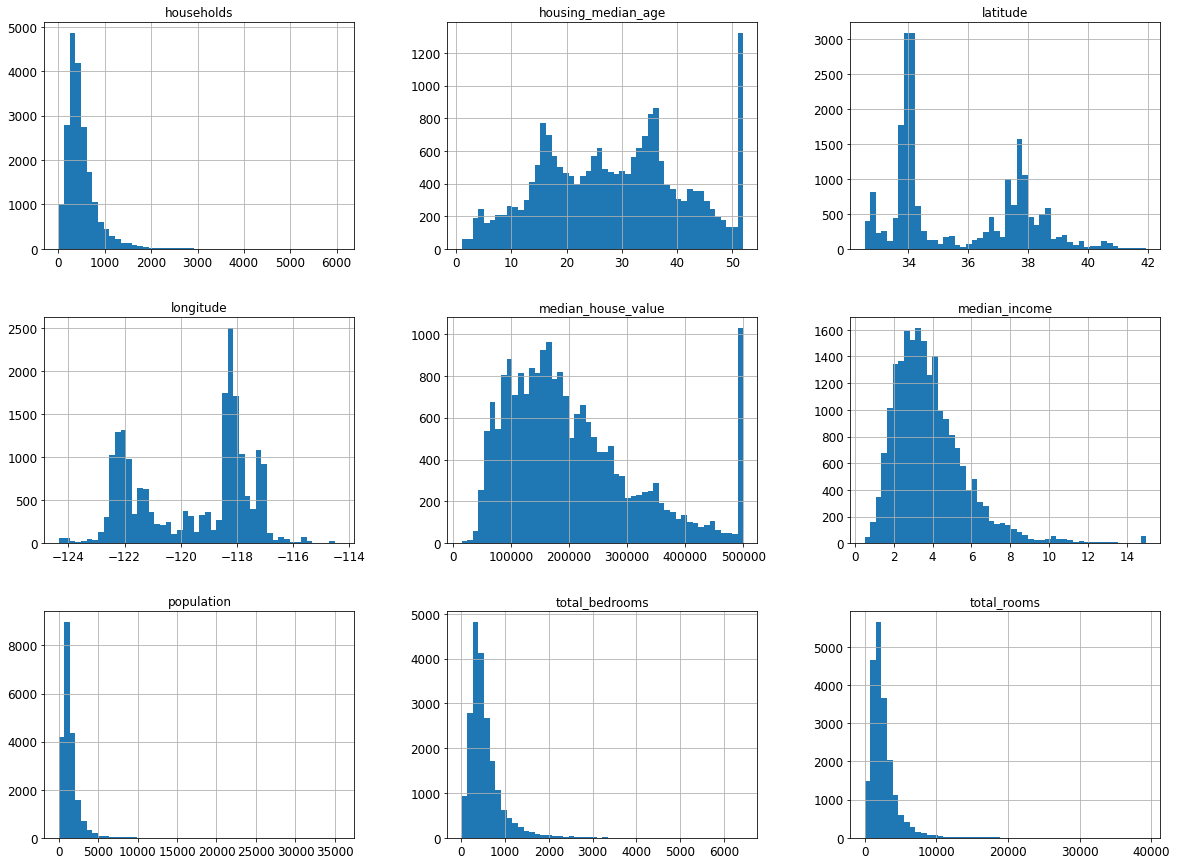

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

### Train-Test split

If a test set is not already provided, we need to create it. We need to make sure that the train-test set is balanced and present similar distributions for the different features.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

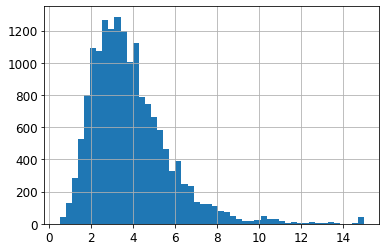

In [16]:
train['median_income'].hist(bins=50)

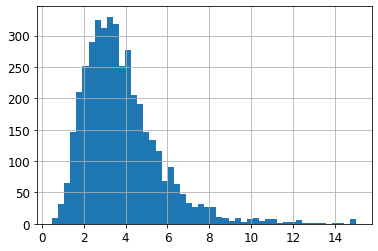

In [17]:
test['median_income'].hist(bins=50)

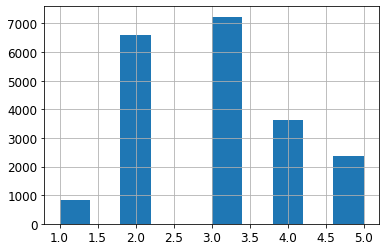

In [18]:
data['income_cat'] = pd.cut(data['median_income'],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
data['income_cat'].hist()

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['income_cat'])

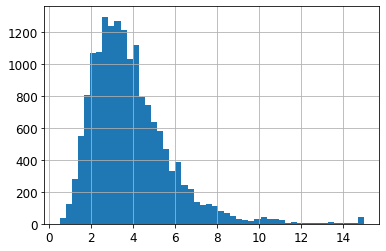

In [20]:
train['median_income'].hist(bins=50)

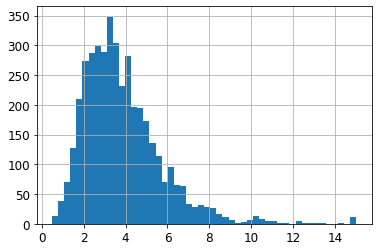

In [21]:
test['median_income'].hist(bins=50)

In [22]:
for set_ in (train, test):
    set_.drop("income_cat", axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train.to_csv('housing_train.csv', index=False)
test.to_csv('housing_test.csv', index=False)

### Get data insights

In [24]:
data = pd.read_csv('housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


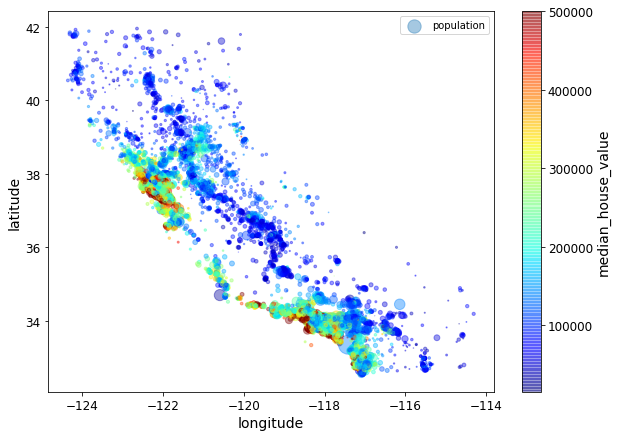

In [25]:
# plot geographical data

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

In [26]:
# looking for correlations

corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

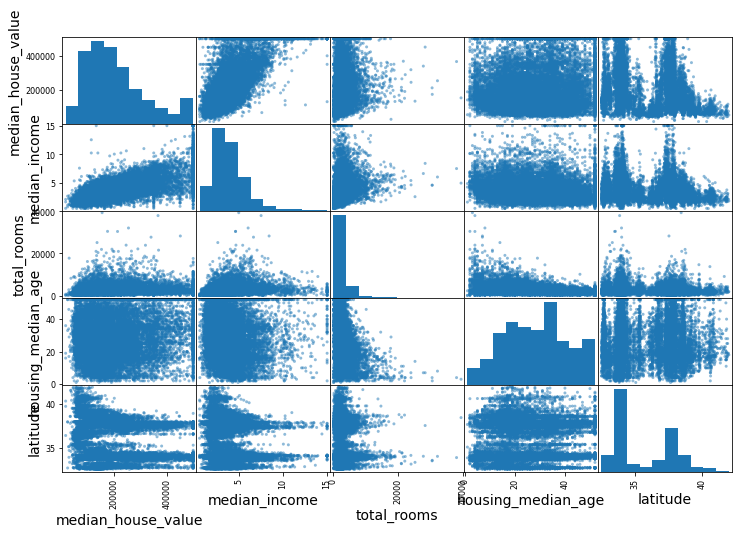

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age", "latitude"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

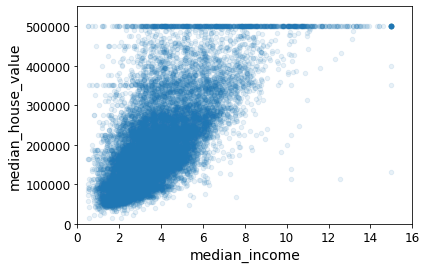

In [28]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

### Feature engineering

We can try to combine several features into new ones with better correlation.

In [ ]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]

In [30]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the data for ML algorithms


First, extract the labels from the data.

In [31]:
data = pd.read_csv('housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [32]:
data, labels = data.drop(['median_house_value'], axis=1), data['median_house_value'].copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [33]:
labels.head()

0    286600.0
1    340600.0
2    196900.0
3     46300.0
4    254500.0
Name: median_house_value, dtype: float64

### Data cleaning

It is common to have missing values in our data. We can procees in different ways: 

- remove the rows with some missing value
- romove the entire feature if some value is missing
- set the missing values to some vale (zero, mean, median, ...). It is important to use a value computed from the test set and save it to use it on the test set !

In [34]:
data[data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
113,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
116,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
216,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
303,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
321,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15722,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
16063,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
16124,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND
16326,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN


In [35]:
data.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [36]:
data.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
0,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN
1,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND
4,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,573.0,210.0,4.9312,INLAND
16508,-117.56,33.88,40.0,1196.0,1052.0,258.0,2.0682,INLAND
16509,-116.40,34.09,9.0,4855.0,2098.0,765.0,3.2723,INLAND
16510,-118.01,33.82,31.0,1960.0,1356.0,356.0,4.0625,<1H OCEAN


In [37]:
data.fillna(data["total_bedrooms"].median()) # option 3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


We can use Scikit-Learn to manage missing values in an automated way. Since numerical and categorical features are treated differently, it is a good practice to separate them.

In [38]:
data_num = data.drop(['ocean_proximity'], axis=1)
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [39]:
data_cat = data[['ocean_proximity']]
data_cat.head()

,ocean_proximity
0,<1H OCEAN
1,<1H OCEAN
2,NEAR OCEAN
3,INLAND
4,<1H OCEAN


In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(data_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
data_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [42]:
# apply median to all missing values

X = imputer.transform(data_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [43]:
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data.index)
data_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


ML algorithms cannot handle non-numerical data. We have to transform the categrical values to numbers. We have several options:

- Use a number determining the class (0, 1, 2, ...). This is recommended if two close classes are more related (like "excelent", "good", "average", "bad").
- One hot encoding. This is recommended if classes are not related at all.

In [44]:
# option 1

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
data_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Custom transformers

You will usually have to write your own data transformation workflow, and you want it to work seamlessly with the rest of Scikit-Learn functionality. You can also add hyperparameters to the transforms (we will see what this means and why it is important).

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
data_extra_attribs = attr_adder.transform(data.values)

### Feature scaling

ML algorithms usually don't perform well if the data has different scales. There are two ways of scaling data:

- min-max scaling (or normalization) consists of shifting values so they end up in the rango 0-1. 
- standarization works by substracting the mean and dividing by the standard deviation. Less affected by outliers, but may not work well with some algorithms.

### Transformation Pipelines

Pipelines allow us to combine different transformations to apply them all together.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

## Select and train a model

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# let's try the full preprocessing pipeline on a few training instances

some_data = data.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [54]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [55]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [57]:
predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The decision tree is able to memorize all the data and achieve 0 error. The problem is that if we pass new data, the model will not perform well due to overffiting. We need to be able to measure our model performance while training. We have two options:

- Split a small part of the training data in a validations set.
- Use cross-validation (recommended if computationally viable).

### Using Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [60]:
lin_scores = cross_val_score(lin_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983443


In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(data_prepared, labels)
predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [62]:
forest_scores = cross_val_score(forest_reg, data_prepared, labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


## Fine-tune your model

Fine-tuning is the process of searching for the best hyperparameters for your model. You can do that manually (not recommended) or using Scikit-Learn.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

### Evaluate your best model

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

Evaluate on test data.

In [ ]:
test_data = pd.read_csv('housing_test.csv')

final_model = grid_search.best_estimator_

X_test = test_data.drop("median_house_value", axis=1)
y_test = test_data["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

## Present your solution

Things to keep in mind when presenting your solution:

- What have you learned
- What worked and what did not
- What assumptions were made
- What are your system limitations

Document everything and prepare a nive presentation with clear visualizations and easy-to-remember statements.

Is your solution better than the current solution (baseline) ?

## Launch, monitor, and mantain your system

Save your model and make it accessible. Popular choices are Web APIs, where users can send requests and receive predictions.

https://housingapp.sensioai.now.sh

To monitor your system you will have to collect fresh data regularly and label it, run the entire pipeline on the new data and check if the system behaves as expected or degrades. The process can be automated and run every day or week.

It is important to keep backups of the models and the data they were trained on in order to revert to previous versions if something breaks !

In [ ]:
import joblib
joblib.dump(final_model, "my_model.pkl")